# Homework1

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(x))

In [12]:
def numerical_derivative(f, x):
    dx = 1e-4
    gradf = np.zeros_like(x)

    it = np.nditer(x, flags = ['multi_index'],
                                op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float((tmp_val)+dx)
        fx1 = f(x)

        x[idx] = float((tmp_val)-dx)
        fx2 = f(x)
        gradf[idx] = (fx1-fx2)/(2*dx)

        x[idx] = tmp_val
        it.iternext()
    return gradf

In [13]:
class logicGate:
    def __init__(self, gate_name, xdata, tdata, learning_rate=0.01, threshold=0.5):
        self.name = gate_name

        self.__xdata=xdata.reshape(4,2)
        self.__tdata=tdata.reshape(4,1)

        self.__w=np.random.rand(2,1)
        self.__b=np.random.rand(1)

        self.__learning_rate = learning_rate
        self.__threshold = threshold

    def __loss_func(self):
        delta = 1e-7

        z = np.dot(self.__xdata, self.__w) + self.__b
        y = sigmoid(z)

        return -np.sum(self.__tdata*np.log(y+delta) + (1-self.__tdata)*np.log((1-y)+delta))

    def err_val(self):
        delta = 1e-7
        z = np.dot(self.__xdata, self.__w)+self.__b
        y = sigmoid(z)
        return -np.sum(self.__tdata + np.log(y+delta) + (1-self.__tdata)*np.log((1-y)+delta))

    def train(self):
        f = lambda x : self.__loss_func()
        print("init error : ", self.err_val())
        
        for stp in range(20000):
            self.__w -= self.__learning_rate * numerical_derivative(f, self.__w)
            self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
            if (stp % 2000 == 0):
                print("step : ", stp, "error : ", self.err_val(), f)

    def predict(self, input_data):
        z = np.dot(input_data, self.__w) + self.__b
        y = sigmoid(z)

        if y[0] > self.__threshold:
            result = 1
        else:
            result = 0
        return y, result

In [14]:
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,0,0,1]])

AND = logicGate("AND", xdata, tdata)
AND.train()
for in_data in xdata:
    (sig_val, logic_val) = AND.predict(in_data)
    print(in_data , " : ", logic_val)

xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,1,1,1]])

OR = logicGate("OR", xdata, tdata)
OR.train()
for in_data in xdata:
    (sig_val, logic_val) = OR.predict(in_data)
    print(in_data , " : ", logic_val)

init error :  4.912964632219174
step :  0 error :  4.90824334280463 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  2000 error :  7.426302085751889 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  4000 error :  9.771621605431895 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  6000 error :  11.425925921574292 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  8000 error :  12.693924285151422 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  10000 error :  13.718323702584541 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  12000 error :  14.57594394825578 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  14000 error :  15.312549113431665 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  16000 error :  15.957482698760625 <function logicGate.train.<locals>.<lambda> at 0x7f34963a40d0>
step :  18000 error :  16.5306326697

# Homework2

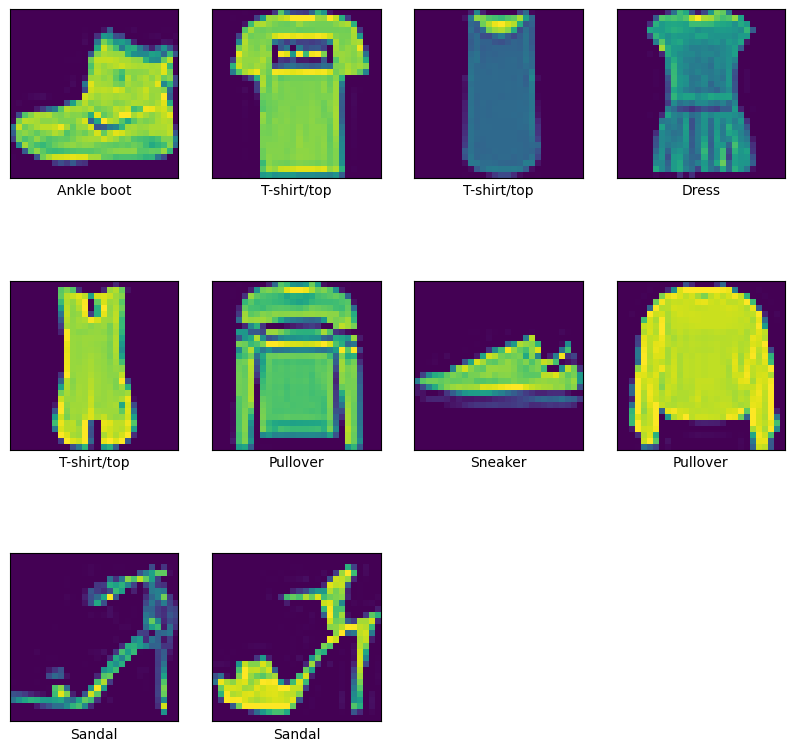

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train/255.0, f_image_test/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()


In [30]:
# ANN
model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

(image_train, label_train), (image_test, label_test) = mnist.load_data()
image_train, image_test = image_train/255.0, image_test/255.0
                                

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(image_train, label_train, epochs=10, batch_size=10)
model.summary()
model.save('mnist.h5')

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9690 - loss: 0.1003
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9800 - loss: 0.0653
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9830 - loss: 0.0535
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9861 - loss: 0.0421
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9888 - loss: 0.0346
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9903 - loss: 0.0300
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9931 - loss: 0.0236
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9929 - loss: 0.0213
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9941 - loss: 0.0195
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9936 - loss: 0.0209


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (10, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (10, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (10, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (10, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('./mnist.h5')
mnist = tf.keras.datasets.mnist
(image_train, label_train), (image_test, label_test) = mnist.load_data()

image_train, image_test = image_train / 255.0, image_test / 255.0
num = 10
predict = model.predict(image_test[:num])
print(label_test[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[7 2 1 0 4 1 4 9 5 9]
 * Prediction,  [7 2 1 0 4 1 4 9 5 9]


In [64]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images

# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics

2024-05-29 16:40:16.242892: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 16:40:16.243304: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 16:40:16.245894: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 16:40:16.276832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 16:40:16.759554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'

# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

['train', '__MACOSX', 'chest_xray', 'test', 'val']
1341
normal picture title:  NORMAL2-IM-0540-0001.jpeg
pneumonia picture title: person1209_bacteria_3161.jpeg


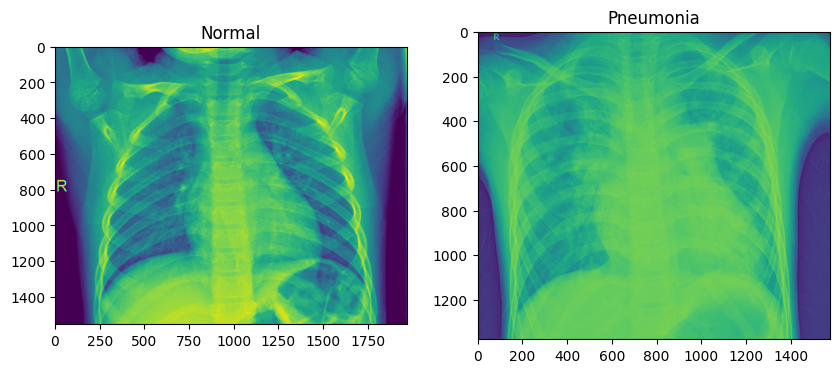

In [3]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

# Homework3

In [28]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), ))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [29]:
num_of_test_samples = 600
batch_size = 32

# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image asyour CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) #Image normalization.

training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
model_fin.summary()

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ global_average_pooling2d_1      │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,256 (110.38 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,838 (73.59 KB)

# Homework5

In [39]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(training_set, epochs=5, batch_size=32)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.9415 - loss: 0.1526
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.9444 - loss: 0.1422
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.9342 - loss: 0.1767
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.9492 - loss: 0.1367
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.9501 - loss: 0.1358


In [40]:
model.save('medical_ann.h5')

In [41]:

import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


#from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics
test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
model_fin = keras.models.load_model('./medical_ann.h5')
test_accu = model_fin.evaluate(test_set, steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

# label 얻기 
labels = test_set.labels

Y_pred = model_fin.predict(test_set)
#y_pred = np.argmax(Y_pred)
y_pred = []
for yy in Y_pred:
    if yy >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
class_name = ["NORMAL", "PNEUMONIA"]
print("actual || predict")
for i in range(624):
    if i%10 == 0:
        print(class_name[labels[i]], end=" || ")
        print(class_name[y_pred[i]], end='\n')


Found 624 images belonging to 2 classes.


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9135 - loss: 0.2903    
The testing accuracy is : 91.34615659713745 %


2024-05-29 17:36:01.734359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
actual || predict
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMO

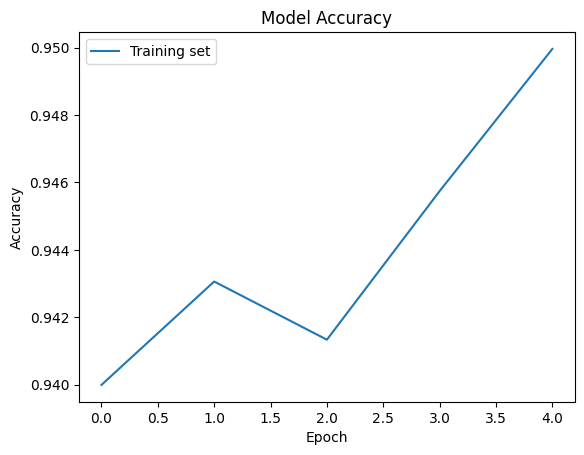

<Figure size 640x480 with 0 Axes>

In [49]:
# Accuracy
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

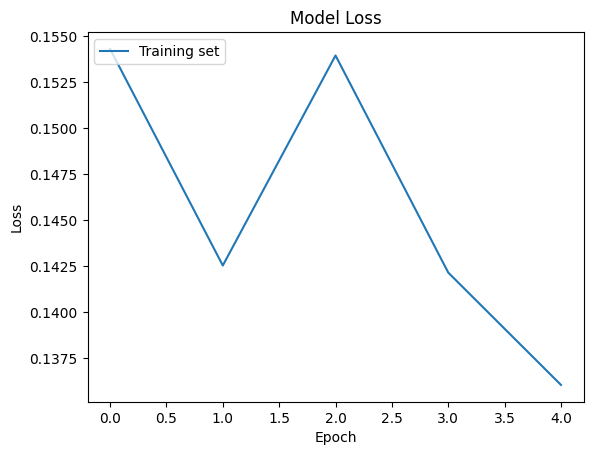

<Figure size 640x480 with 0 Axes>

In [50]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],
loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()